## Evaluation Project --> Restaurant Food Cost

#Here in this project, you will be predicting the cost of the food served by the restaurants across different cities in India. 
#You will use your Data Science skills to investigate the factors that really affect the cost, 
#and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records

Size of test set: 4,231 records

#FEATURES:
#TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

#RESTAURANT_ID: A unique ID for each restaurant.

#CUISINES: The variety of cuisines that the restaurant offers.

#TIME: The open hours of the restaurant.

#CITY: The city in which the restaurant is located.

#LOCALITY: The locality of the restaurant.

#RATING: The average rating of the restaurant by customers.

#VOTES: The overall votes received by the restaurant.

#COST: The average cost of a two-person meal.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
foodcost = pd.read_csv("FoodCost_Train.csv")
foodcost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
#print the first five rows
foodcost.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
#print the last five rows 
foodcost.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [5]:
#print a random sample of dataset
foodcost.sample()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
494,QUICK BITES,1172,"Chinese, North Indian",11am – 11:30pm (Mon-Sun),Bengaluru,BTM Layout 1,3.7,27 votes,300


In [6]:
#to check the dimension of the dataset
foodcost.shape

(12690, 9)

#there are 12690 rows and 9 columns

In [7]:
#to check for the information of dataset
foodcost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
#to check the data types
foodcost.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

#There are 7 object type columns and 2 int 64 type columns.
#we have to convert Ratings and Votes to numeric types columns.

In [9]:
#since the "title" and "Restaurant ID" and "Time" columns are unique and not contribute as important feature. so we ca drop them.
foodcost.drop(columns=["TITLE","RESTAURANT_ID","TIME"],inplace = True)

In [10]:
foodcost.shape

(12690, 6)

In [11]:
#to check for the null values
foodcost.isnull().sum()

CUISINES       0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

#there are some null values in the dataset columns "City","Locality","ratings","votes". so we have to handle them accordingly.

In [12]:
#we can null values of "city" and "locality" with "missing"
foodcost["CITY"].fillna("missing",inplace=True)
foodcost["LOCALITY"].fillna("missing",inplace=True)

In [13]:
#finding unique value counts
for i in foodcost.columns:
    if foodcost[i].dtype=="object":
        print(foodcost[i].value_counts())
        print("\n")

South Indian                                                     532
North Indian                                                     526
North Indian, Chinese                                            501
Fast Food                                                        286
Chinese                                                          167
                                                                ... 
North Indian, Asian, South Indian                                  1
Mexican, Burger, Cafe, Italian, Pizza, Rolls, Lebanese, Asian      1
Multi Cuisine                                                      1
North Indian, Continental, Chinese, Pizza                          1
Street Food, Tibetan, Momos                                        1
Name: CUISINES, Length: 4155, dtype: int64


Chennai             2174
Bangalore           2149
Hyderabad           1819
Mumbai              1722
New Delhi           1321
                    ... 
Hitech City            1
1st Stage            

In [15]:
#in the "rating" columns there are 707 as "new" values and "-" as 495 values can be replaced by 0 values
foodcost["RATING"].replace("NEW",0,inplace=True)
foodcost["RATING"].replace("-",0,inplace=True)
foodcost["RATING"].fillna(0,inplace=True)

In [19]:
#In the "VOTES" column it can be conveted to int by stripping off "votes" string wherever present
foodcost["VOTES"]=foodcost["VOTES"].str.strip(" votes")

In [23]:
#there are 1204 values missing in the "votes" column where "rating" columns has "new","-" values.so we can replace by it "0" votes.
foodcost['VOTES'].fillna(0,inplace = True)

In [25]:
foodcost.isnull().sum()

CUISINES    0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [26]:
#Lets change the datatypes of"RATING" to float and "VOTES" to int
foodcost["RATING"]=foodcost["RATING"].astype(float)
foodcost["VOTES"]=foodcost["VOTES"].astype(int)

In [27]:
#checking the dtypes
foodcost.dtypes

CUISINES     object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int32
COST          int64
dtype: object

In [28]:
#we will divide the CUISINES column into multiple columns
#First we will find maximum number of cuisines restaurant are serving
max_cuisines=-1
for i in range(len(foodcost["CUISINES"])):
    temp=len(foodcost["CUISINES"].iloc[i].split(","))
    if temp>max_cuisines:
        max_cuisines=temp
print("Maximum no. of cuisines serverd in the restaurant are :{}".format(max_cuisines))

Maximum no. of cuisines serverd in the restaurant are :8


In [29]:
col1=list()
col2=list()
col3=list()
col4=list()
col5=list()
col6=list()
col7=list()
col8=list()
for j in range(len(foodcost["CUISINES"])):
    temp=foodcost["CUISINES"].iloc[j].split(",")
    try :
        col1.append(temp[0].strip().upper())
    except :
        col1.append('NONE')
    try :
        col2.append(temp[1].strip().upper())
    except :
        col2.append('NONE')
    try :
        col3.append(temp[2].strip().upper())
    except :
        col3.append('NONE')
    try :
        col4.append(temp[3].strip().upper())
    except :
        col4.append('NONE')
    try :
        col5.append(temp[4].strip().upper())
    except :
        col5.append('NONE')
    try :
        col6.append(temp[5].strip().upper())
    except :
        col6.append('NONE')
    try :
        col7.append(temp[6].strip().upper())
    except :
        col7.append('NONE')
    try :
        col8.append(temp[7].strip().upper())
    except :
        col8.append('NONE')

In [30]:
foodcost["col1"]=col1
foodcost["col2"]=col2
foodcost["col3"]=col3
foodcost["col4"]=col4
foodcost["col5"]=col5
foodcost["col6"]=col6
foodcost["col7"]=col7
foodcost["col8"]=col8

In [31]:
#display the dataset
foodcost

,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,col1,col2,col3,col4,col5,col6,col7,col8
0,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE
1,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE
2,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE
3,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE
4,Desserts,Mumbai,Lower Parel,3.8,165,300,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546,500,NORTH INDIAN,BURGER,KEBAB,NONE,NONE,NONE,NONE,NONE
12686,"Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214,1800,GOAN,CONTINENTAL,NONE,NONE,NONE,NONE,NONE,NONE
12687,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608,1300,FINGER FOOD,CONTINENTAL,ASIAN,CHINESE,NONE,NONE,NONE,NONE
12688,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32,400,NORTH INDIAN,SOUTH INDIAN,CHINESE,STREET FOOD,NONE,NONE,NONE,NONE


In [33]:
# We can drop "CUISINE" columns as we have splitted it in 8 columns
foodcost.drop(columns=["CUISINES",],inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in foodcost.columns:
    if foodcost[x].dtype=="object":
        foodcost[x]=le.fit_transform(foodcost[x])

In [35]:
foodcost

,CITY,LOCALITY,RATING,VOTES,COST,col1,col2,col3,col4,col5,col6,col7,col8
0,320,285,3.6,49,1200,59,32,67,61,58,47,32,15
1,67,1046,4.2,30,1500,6,60,41,61,58,47,32,15
2,67,1101,3.8,221,800,72,23,12,32,58,47,32,15
3,222,136,4.1,24,800,100,23,65,61,58,47,32,15
4,222,620,3.8,165,300,28,65,65,61,58,47,32,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,131,342,3.8,546,500,72,17,44,61,58,47,32,15
12686,222,133,4.3,1214,1800,37,25,65,61,58,47,32,15
12687,239,1342,4.0,608,1300,34,25,4,18,58,47,32,15
12688,67,631,3.5,32,400,72,85,21,77,58,47,32,15


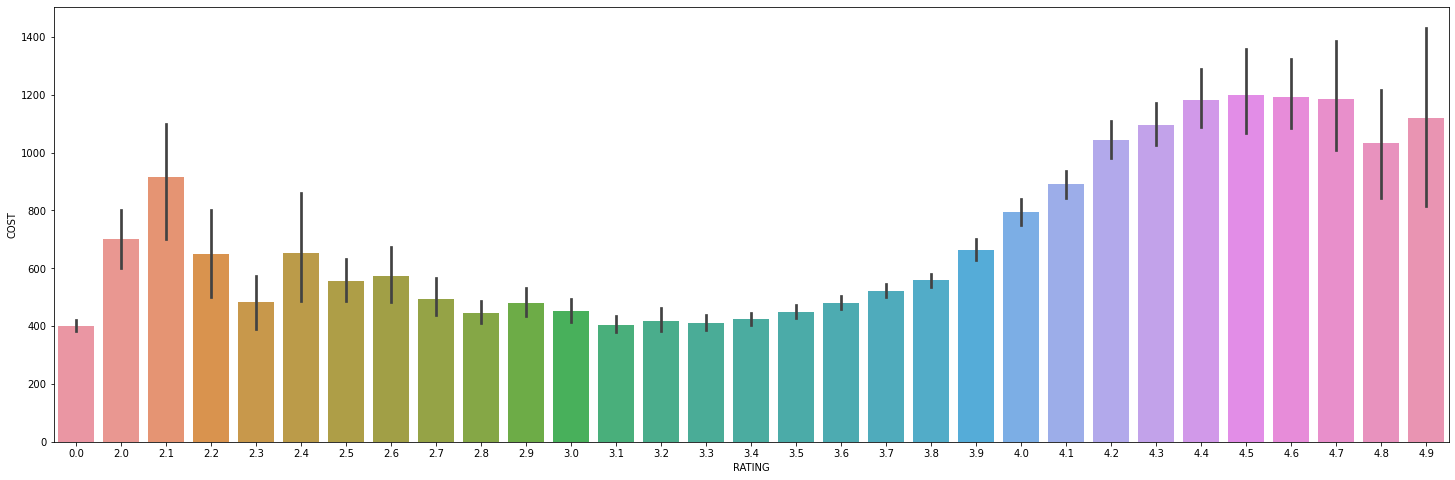

In [38]:
#barplot of rating vs cost
plt.figure(figsize=(25,8))
sns.barplot(x="RATING",y="COST",data=foodcost)
plt.show()

#the plot shows retaurant with ratings between 4.4 to 5 have higher cost compared to other ratings.

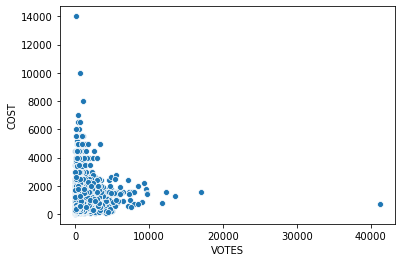

In [42]:
#scatterplot of votes vs cost
sns.scatterplot(x="VOTES",y="COST",data=foodcost)
plt.show()

#the plots shows cost is decrerasing with the increase in the votes.

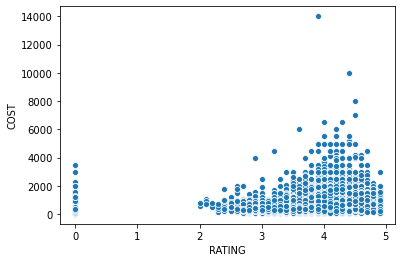

In [43]:
#scatterplot of ratings vs cost.
sns.scatterplot(x="RATING",y="COST",data=foodcost)
plt.show()

#the plot shows as the rating with value 4 and 5 the cost is more compared to others.

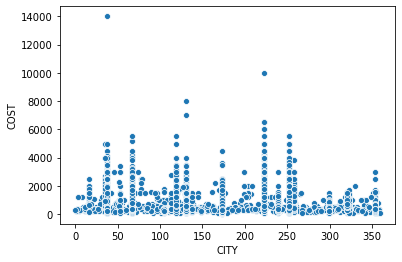

In [44]:
#scatterplot for city vs cost
sns.scatterplot(x="CITY",y="COST",data=foodcost)
plt.show()

#the plot shows city between 225 and 250 have higher higher cost compared to others.

In [45]:
#statistical summary
foodcost.describe()

,CITY,LOCALITY,RATING,VOTES,COST,col1,col2,col3,col4,col5,col6,col7,col8
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,144.814894,660.609220,3.426296,376.231127,655.252246,49.238298,48.029078,53.631836,56.258314,56.238692,46.602364,31.793617,14.926399
std,85.919816,403.571164,1.179799,810.946942,627.003540,28.530149,24.401123,21.232479,14.490037,8.845198,3.973031,2.464828,1.022146
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,337.000000,3.400000,39.250000,300.000000,25.000000,23.000000,37.000000,61.000000,58.000000,47.000000,32.000000,15.000000
50%,131.000000,590.000000,3.800000,132.000000,500.000000,48.000000,61.000000,65.000000,61.000000,58.000000,47.000000,32.000000,15.000000
75%,222.000000,1011.000000,4.000000,405.000000,800.000000,72.000000,65.000000,65.000000,61.000000,58.000000,47.000000,32.000000,15.000000
max,359.000000,1416.000000,4.900000,41186.000000,14000.000000,103.000000,98.000000,93.000000,85.000000,78.000000,69.000000,46.000000,19.000000


#observations:-
#1. The mean of "city","Locality","Votes","cost" columns is higher than the median values.
#2. The mean of the "Rating" column is less than the median column
#3. The mean of the "col1","col2","col3","col4","col5","col6","col7","col8" have mean less than median values.
#4. there is large difference between 75% and max values of "votes" column.

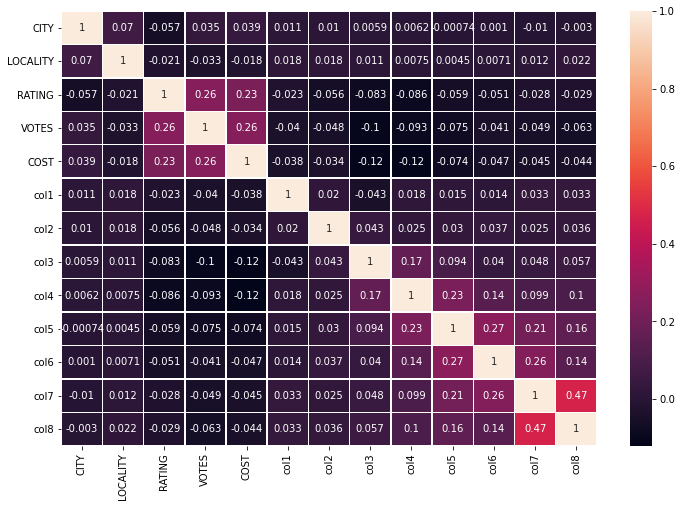

In [47]:
#find the correlation
plt.figure(figsize=(12,8))
foodcorr = foodcost.corr()
sns.heatmap(foodcorr,annot =True, linewidth =0.5)
plt.show()

#observations:-
#1. there is positive correlation between rating and cost columns.
#2. there is positive correlation between Votes and cost.
#3. there is weak negetive correltion between "locality","col1","col2","col5","col6","col7","col8" and "cost" column.
#4. there is strong negetive correlation between "col3","col4" and "cost" column.
#5. there is weak positive correlation between "city" and cost column.

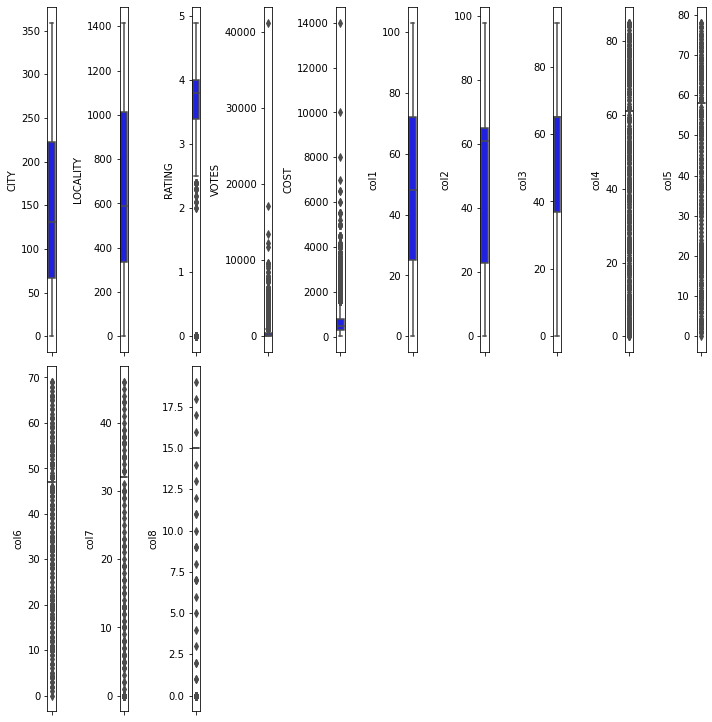

In [49]:
#plotting boxplots
collist = foodcost.columns
ncols=10
nrows=10
plt.figure(figsize=(10,5*10))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(foodcost[collist[i]],color='blue',orient='v')
    plt.tight_layout()

#there are some outliers present in the dataset. so we should handle them.

In [50]:
#checking the zscore
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(foodcost))
threshold = 3
new_food = foodcost[(z<3).all(axis=1)]

In [51]:
new_food.shape

(11316, 13)

In [52]:
p_loss = ((12961-11316)/12961)*100
p_loss

12.691921919604967

#as the data loss is more than 10%. we should not outliers.

In [53]:
#finding the skewness
foodcost.skew()

CITY         0.297804
LOCALITY     0.333505
RATING      -2.214271
VOTES       14.522617
COST         3.978801
col1         0.022450
col2        -0.102601
col3        -0.957442
col4        -2.302018
col5        -4.379358
col6        -7.347635
col7       -10.796655
col8       -14.020045
dtype: float64

###### Separating x and y variables

In [54]:
x = foodcost.drop("COST",axis =1)
y = foodcost['COST']

In [55]:
print(x.shape)
print(y.shape)

(12690, 12)
(12690,)


In [62]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

###### finding the best model

In [67]:
#finding the best random state using train test split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
best_rstate = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
        
print(f"Best accuracy{accu*100} found on random state {best_rstate}")

Best accuracy13.980421385860286 found on random state 162


###### Linear Regression

In [68]:
#creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state =162)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(lr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 13.980421385860286, cross_val_score : 9.596055093267326 & differnece : 4.38436629259296


###### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(rf,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 38.31037254477487, cross_val_score : 32.868120263271614 & differnece : 5.442252281503258


###### SGD Regressor

In [73]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(sgd,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 13.949835044243619, cross_val_score : 9.11571162775428 & differnece : 4.834123416489339


#we can choose the best model as Random forest regressor

###### Serialization

In [74]:
import pickle
filename= 'restaurant_food.pkl'
pickle.dump(rf,open(filename,'wb'))

###### loading the test dataset

In [75]:
test_data = pd.read_csv("FoodCost_Test.csv")
test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [76]:
test_data.shape

(4231, 8)

In [77]:
test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [78]:
test_data.drop(columns=["TITLE","RESTAURANT_ID","TIME"],inplace = True)

In [79]:
test_data["CITY"].fillna("missing",inplace=True)
test_data["LOCALITY"].fillna("missing",inplace=True)

In [80]:
test_data["RATING"].replace("NEW",0,inplace=True)
test_data["RATING"].replace("-",0,inplace=True)
test_data["RATING"].fillna(0,inplace=True)

In [82]:
test_data["VOTES"]=test_data["VOTES"].str.strip(" votes")

In [88]:
test_data['VOTES'].fillna(0,inplace = True)

In [89]:
#Lets change the datatypes of"RATING" to float and "VOTES" to int
test_data["RATING"]=test_data["RATING"].astype(float)
test_data["VOTES"]=test_data["VOTES"].astype(int)

In [90]:
test_data.dtypes

CUISINES     object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int32
dtype: object

In [91]:
#we will divide the CUISINES column into multiple columns
#First we will find maximum number of cuisines restaurant are serving
max_cuisines=-1
for i in range(len(test_data["CUISINES"])):
    temp=len(test_data["CUISINES"].iloc[i].split(","))
    if temp>max_cuisines:
        max_cuisines=temp
print("Maximum no. of cuisines serverd in the restaurant are :{}".format(max_cuisines))

Maximum no. of cuisines serverd in the restaurant are :8


In [92]:
col1=list()
col2=list()
col3=list()
col4=list()
col5=list()
col6=list()
col7=list()
col8=list()
for j in range(len(test_data["CUISINES"])):
    temp=test_data["CUISINES"].iloc[j].split(",")
    try :
        col1.append(temp[0].strip().upper())
    except :
        col1.append('NONE')
    try :
        col2.append(temp[1].strip().upper())
    except :
        col2.append('NONE')
    try :
        col3.append(temp[2].strip().upper())
    except :
        col3.append('NONE')
    try :
        col4.append(temp[3].strip().upper())
    except :
        col4.append('NONE')
    try :
        col5.append(temp[4].strip().upper())
    except :
        col5.append('NONE')
    try :
        col6.append(temp[5].strip().upper())
    except :
        col6.append('NONE')
    try :
        col7.append(temp[6].strip().upper())
    except :
        col7.append('NONE')
    try :
        col8.append(temp[7].strip().upper())
    except :
        col8.append('NONE')

In [93]:
test_data["col1"]=col1
test_data["col2"]=col2
test_data["col3"]=col3
test_data["col4"]=col4
test_data["col5"]=col5
test_data["col6"]=col6
test_data["col7"]=col7
test_data["col8"]=col8

In [94]:
test_data.drop(columns=["CUISINES",],inplace=True)

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in test_data.columns:
    if test_data[x].dtype=="object":
        test_data[x]=le.fit_transform(test_data[x])

In [96]:
test_data

,CITY,LOCALITY,RATING,VOTES,col1,col2,col3,col4,col5,col6,col7,col8
0,110,662,4.3,564,60,19,56,33,42,30,25,6
1,96,221,4.2,61,73,24,62,50,42,30,25,6
2,96,411,3.8,350,60,70,13,15,42,30,25,6
3,41,456,3.8,1445,12,59,58,49,42,30,25,6
4,78,300,3.6,23,73,42,58,49,42,30,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,108,597,3.9,287,60,57,19,49,42,30,25,6
4227,9,237,4.3,469,12,60,66,54,57,30,25,6
4228,41,696,3.7,53,22,60,58,49,42,30,25,6
4229,78,332,0.0,0,67,10,58,49,42,30,25,6


In [97]:
#checking the zscore
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(test_data))
threshold = 3
new_test = test_data[(z<3).all(axis=1)]

In [98]:
foodcost.skew()

CITY         0.297804
LOCALITY     0.333505
RATING      -2.214271
VOTES       14.522617
COST         3.978801
col1         0.022450
col2        -0.102601
col3        -0.957442
col4        -2.302018
col5        -4.379358
col6        -7.347635
col7       -10.796655
col8       -14.020045
dtype: float64

###### load the model

In [99]:
fitted_model = pickle.load(open('restaurant_food.pkl',"rb"))
fitted_model

RandomForestRegressor()

In [100]:
predictions = fitted_model.predict(test_data)
predictions

array([2740.5, 2740.5, 2740.5, ..., 2740.5, 1103.5, 2740.5])